In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data import get_data,get_product_df

df = get_data()
product_df = get_product_df()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df["Revenue"] = df["Price"] * df["Quantity"]

Joining Two Tables

In [ ]:
merged_df = pd.merge(df, product_df, on="Product", how="inner")
merged_df


,Order_ID,Date,Product,Category,Quantity,Price,Month,Year,Revenue,Brand,Cost_Price
0,1001,2024-01-05,Laptop,Electronics,1,55000,1,2024,55000,Dell,42000
1,1002,2024-01-07,Mobile,Electronics,2,20000,1,2024,40000,Samsung,15000
2,1003,2024-01-10,Headphones,Accessories,3,2000,1,2024,6000,Boat,1200
3,1004,2024-02-03,Laptop,Electronics,1,55000,2,2024,55000,Dell,42000
4,1005,2024-02-10,Mobile,Electronics,1,20000,2,2024,20000,Samsung,15000
5,1006,2024-02-15,Keyboard,Accessories,2,1500,2,2024,3000,Logitech,900
6,1007,2024-03-01,Mobile,Electronics,3,20000,3,2024,60000,Samsung,15000
7,1008,2024-03-05,Laptop,Electronics,2,55000,3,2024,110000,Dell,42000
8,1009,2024-03-10,Mouse,Accessories,4,800,3,2024,3200,HP,400
9,1010,2024-03-15,Headphones,Accessories,1,2000,3,2024,2000,Boat,1200


In [ ]:
merged_df["Profit_per_unit"] = merged_df["Price"]-merged_df["Cost_Price"]
merged_df["Profit"] = merged_df["Profit_per_unit"] * merged_df["Quantity"]
merged_df

,Order_ID,Date,Product,Category,Quantity,Price,Month,Year,Revenue,Brand,Cost_Price,Profit_per_unit,Profit
0,1001,2024-01-05,Laptop,Electronics,1,55000,1,2024,55000,Dell,42000,13000,13000
1,1002,2024-01-07,Mobile,Electronics,2,20000,1,2024,40000,Samsung,15000,5000,10000
2,1003,2024-01-10,Headphones,Accessories,3,2000,1,2024,6000,Boat,1200,800,2400
3,1004,2024-02-03,Laptop,Electronics,1,55000,2,2024,55000,Dell,42000,13000,13000
4,1005,2024-02-10,Mobile,Electronics,1,20000,2,2024,20000,Samsung,15000,5000,5000
5,1006,2024-02-15,Keyboard,Accessories,2,1500,2,2024,3000,Logitech,900,600,1200
6,1007,2024-03-01,Mobile,Electronics,3,20000,3,2024,60000,Samsung,15000,5000,15000
7,1008,2024-03-05,Laptop,Electronics,2,55000,3,2024,110000,Dell,42000,13000,26000
8,1009,2024-03-10,Mouse,Accessories,4,800,3,2024,3200,HP,400,400,1600
9,1010,2024-03-15,Headphones,Accessories,1,2000,3,2024,2000,Boat,1200,800,800


In [ ]:
profit_by_product = merged_df.groupby("Product")["Profit"].sum().reset_index().sort_values("Profit",ascending=False).reset_index(drop = True)
total_profit = profit_by_product["Profit"].sum()
total_profit
total_orders = merged_df["Order_ID"].nunique()
total_orders

10

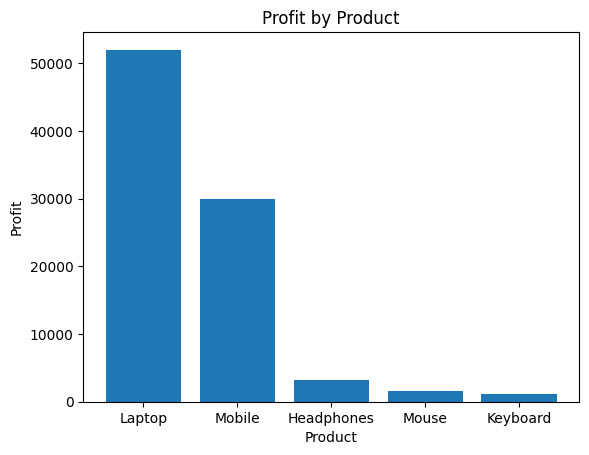

In [ ]:
plt.bar(profit_by_product["Product"],profit_by_product["Profit"])
plt.xlabel("Product")
plt.ylabel("Profit")
plt.title("Profit by Product")
plt.show()

In [ ]:
best_brand = merged_df.groupby("Brand")["Profit"].sum().reset_index().sort_values("Profit",ascending = False).reset_index(drop = True)
best_brand

,Brand,Profit
0,Dell,52000
1,Samsung,30000
2,Boat,3200
3,HP,1600
4,Logitech,1200


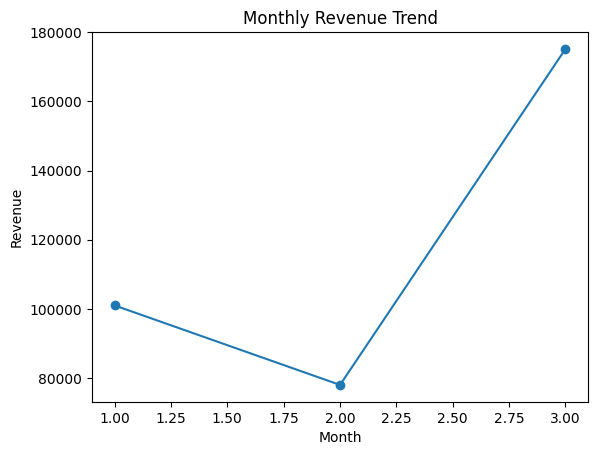

In [ ]:
monthly_revenue = merged_df.groupby("Month")["Revenue"].sum()
monthly_revenue.plot(kind="line", marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()
